In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import fiona
import rasterio
import rasterio.mask
from rasterio.plot import reshape_as_image
import geopandas as gpd

In [2]:
with rasterio.open('data.jp2','r',driver='JP2OpenJPEG') as src:
    raster_img=src.read()
    raster_meta=src.meta
    

In [3]:
raster_meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 5500020.0)}

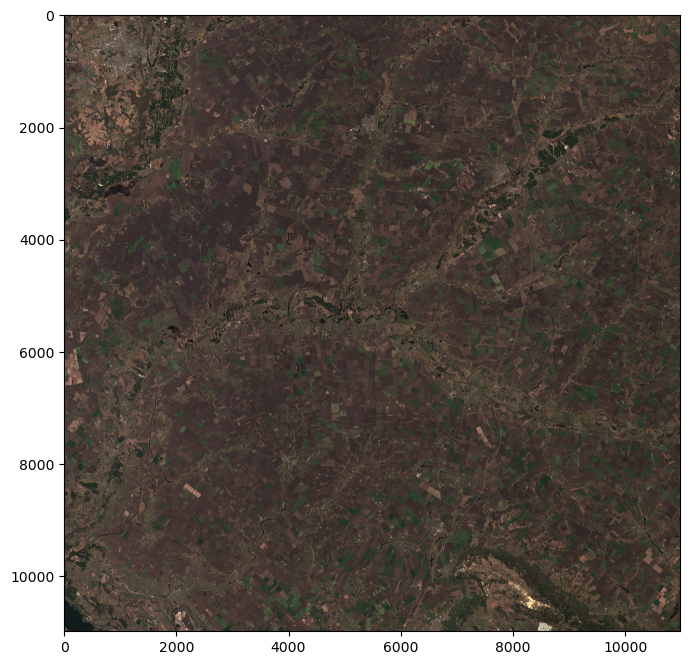

In [4]:
raster_img=reshape_as_image(raster_img)
plt.figure(figsize=(15,8))
plt.imshow(raster_img)

In [5]:
from shapely.geometry import mapping

In [6]:
train_df=gpd.read_file('masks/Masks_T36UXV_20190427.shp')
print(len(train_df))
train_df.head()

936


id  Data  Code       Descriptio Comments                   Image  \
0  None  None   2.0   branch of tree     None  T36UXV_20190427T083601   
1  None  None   1.0  color+ feathers     None  T36UXV_20190427T083601   
2  None  None   2.0   brahch of tree     None  T36UXV_20190427T083601   
3  None  None   1.0  color+ feathers     None  T36UXV_20190427T083601   
4  None  None   1.0  color+ feathers     None  T36UXV_20190427T083601   

                                            geometry  
0  POLYGON ((35.62916 49.60293, 35.63015 49.60163...  
1  POLYGON ((35.65070 49.60254, 35.65248 49.60301...  
2  POLYGON ((35.63023 49.60826, 35.62960 49.60920...  
3  POLYGON ((35.62033 49.60905, 35.62064 49.60968...  
4  POLYGON ((35.60455 49.61078, 35.60597 49.61228...

In [7]:
src=rasterio.open('data.jp2')
failed=[]
for num , row in train_df.iterrows():
    try:
        out_image,out_transform=rasterio.mask.mask(src,[mapping(row['geometry'])],crop=True,nodata=0)
    except:
        failed.append(num)
print('failed {}'.format(len(failed)))

failed 936


In [8]:
train_df['geometry'][0].exterior.coords.xy

(array('d', [35.62916346617293, 35.63014960535702, 35.631175190108465, 35.631214635675825, 35.630031268654925, 35.62888734720139, 35.62813788142149, 35.62774342574785, 35.62813788142149, 35.62916346617293]),
 array('d', [49.602931546762534, 49.60162984303954, 49.60080148612491, 49.59981534694083, 49.6001703570471, 49.60111705066382, 49.60214263541526, 49.60289210119517, 49.60312877459935, 49.602931546762534]))

In [9]:
from rasterio.crs import CRS

In [10]:
train_df=gpd.read_file('masks/Masks_T36UXV_20190427.shp')

train_df=train_df[train_df.geometry.notnull()]

train_df.crs=CRS.from_dict({'init':'epsg:4267'})

train_df=train_df.to_crs(CRS.from_dict({'init':raster_meta['crs']['init']}))

In [11]:
raster_meta['crs']['init']

'epsg:32636'

In [12]:
train_df.crs

<Derived Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
train_df

id  Data  Code        Descriptio Comments                   Image  \
0    None  None   2.0    branch of tree     None  T36UXV_20190427T083601   
1    None  None   1.0   color+ feathers     None  T36UXV_20190427T083601   
2    None  None   2.0    brahch of tree     None  T36UXV_20190427T083601   
3    None  None   1.0   color+ feathers     None  T36UXV_20190427T083601   
4    None  None   1.0   color+ feathers     None  T36UXV_20190427T083601   
..    ...   ...   ...               ...      ...                     ...   
931  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
932  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
933  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
934  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
935  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   

                                              geometry  
0    POLYGON ((689961.152 5497804.667, 690037.456 5...  
1    POLYGON ((691518.623 5497815.456, 691645.003 5...  
2    POLYGON ((690017.383 5498399.293, 689968.112 5...  
3    POLYGON ((689299.133 5498462.011, 689319.252 5...  
4    POLYGON ((688152.716 5498615.331, 688249.512 5...  
..                                                 ...  
931  POLYGON ((690012.338 5435767.601, 689998.527 5...  
932  POLYGON ((689303.051 5435318.547, 689365.361 5...  
933  POLYGON ((690499.318 5436948.995, 690529.292 5...  
934  POLYGON ((685438.102 5404906.207, 685405.307 5...  
935  POLYGON ((685260.344 5405067.394, 685271.346 5...  

[935 rows x 7 columns]

In [14]:
train_df['id']=train_df.index

In [15]:
train_df.head()

id  Data  Code       Descriptio Comments                   Image  \
0   0  None   2.0   branch of tree     None  T36UXV_20190427T083601   
1   1  None   1.0  color+ feathers     None  T36UXV_20190427T083601   
2   2  None   2.0   brahch of tree     None  T36UXV_20190427T083601   
3   3  None   1.0  color+ feathers     None  T36UXV_20190427T083601   
4   4  None   1.0  color+ feathers     None  T36UXV_20190427T083601   

                                            geometry  
0  POLYGON ((689961.152 5497804.667, 690037.456 5...  
1  POLYGON ((691518.623 5497815.456, 691645.003 5...  
2  POLYGON ((690017.383 5498399.293, 689968.112 5...  
3  POLYGON ((689299.133 5498462.011, 689319.252 5...  
4  POLYGON ((688152.716 5498615.331, 688249.512 5...

In [16]:
src=rasterio.open('data.jp2')
failed=[]
for num , row in train_df.iterrows():
    try:
        out_image,out_transform=rasterio.mask.mask(src,[mapping(row['geometry'])],crop=True,nodata=0)
    except:
        failed.append(num)
print('failed {}'.format(len(failed)))

failed 435


In [17]:
src=rasterio.open('data.jp2','r',driver='JP2OpenJPEG')
outfolder='masks/images'
os.makedirs(outfolder,exist_ok=True)
failed=[]
for num,row in train_df.iterrows():
    try:
        masked_image,out_transform=rasterio.mask.mask(src,[row['geometry']],crop=True,nodata=0)
        img_image=reshape_as_image(masked_image)
        img_path=os.path.join(outfolder,str(row['id'])+'.png')
        img_image=cv2.cvtColor(img_image,cv2.COLOR_RGB2BGR)
        cv2.imwrite(img_path,img_image)
    except Exception as e:
        failed.append(num)
print('failed {}'.format(len(failed)))


failed 435


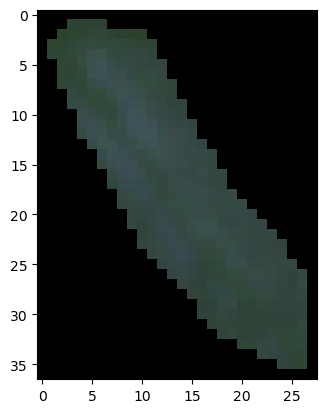

In [18]:
image=cv2.imread('masks/images/0.png')
plt.imshow(image)

In [23]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union,unary_union
import numpy as np
from rasterio.features import rasterize

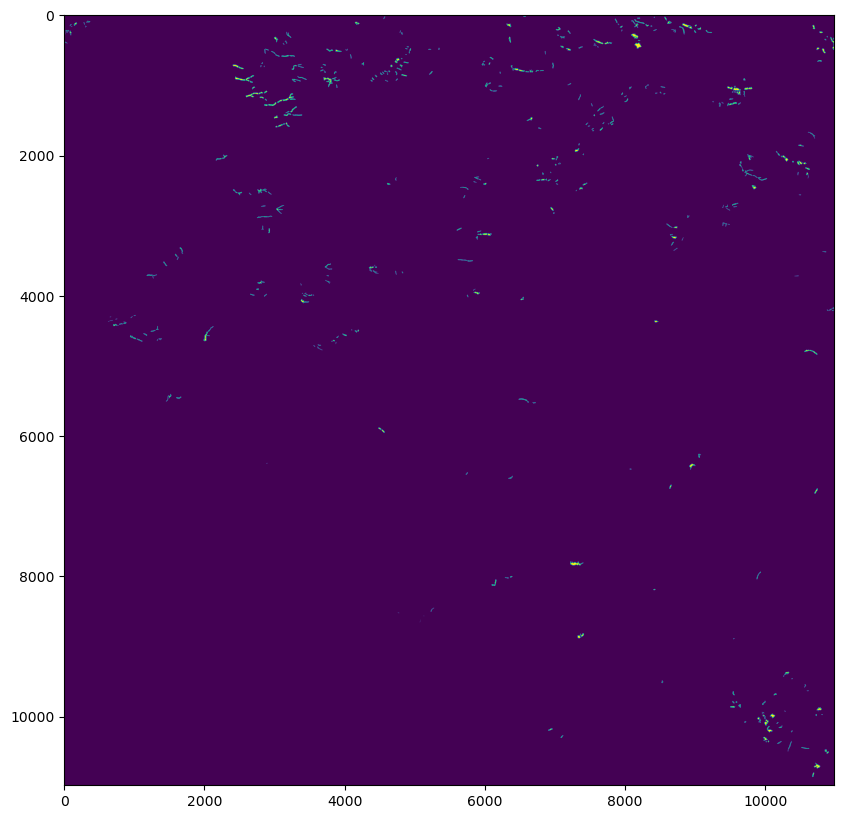

In [24]:
def poly_from_utm(polygon,transform):
    poly_pts=[]
    
    poly=unary_union(polygon)
    for i in np.array(poly.exterior.coords):
        poly_pts.append(~transform*tuple(i))
    new_poly=Polygon(poly_pts)
    return new_poly


poly_shp=[]
im_size=(src.meta['height'],src.meta['width'])
for num,row in train_df.iterrows():
    if row['geometry'].geom_type=='Polygon':
        poly=poly_from_utm(row['geometry'],src.meta['transform'])
        poly_shp.append(poly)
    else:
        for p in row['geometry']:
            poly=poly_from_utm(p,src.meta['transform'])
            poly_shp.append(poly)

mask=rasterize(shapes=poly_shp,
              out_shape=im_size)


plt.figure(figsize=(12,10))
plt.imshow(mask)

In [25]:
bin_mask_meta=src.meta.copy()
bin_mask_meta.update({'count':1})
with rasterio.open('train.jp2','w',**bin_mask_meta) as dst:
    dst.write(mask*255,1)

After 2 days of research how to fix crs and masking jp2 with .png,

I am leaving project there as I can't  continue.

This my first time working with  this kind of  files.

In this small period of time I gain  many helpfull informations.


# Thanks for giving this oportunity
